In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

In [7]:
def get_index(seq, dtype):
    return pd.Index(seq, dtype=dtype)

def get_meta(pmfs, probs):
    pmf = pd.Series(probs, index=get_index(pmfs, 'object'))
    pmf *= 1 / pmf.sum()
    return pmf

def get_mix(meta_pmf):
    mix = pd.Series()
    for pmf, outer_v in meta_pmf.items():
        for i, inner_v in pmf.items():
            mix.at[i] = mix.get(i,0) + (outer_v * inner_v)
    mix *= 1 / mix.sum()
    return mix


Text(0.5,1,'dice outcomes')

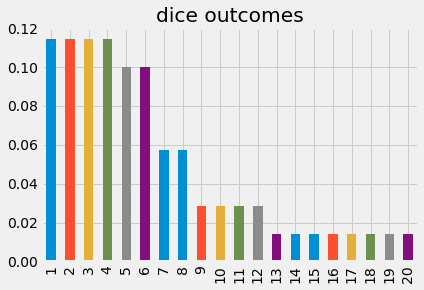

In [8]:
def get_die(sides):
    return pd.Series(1.0, index=range(1,sides+1))

sides = [4,6,8,12,20]
dice = [get_die(i) for i in sides]
dice_probs = [1,3,2,1,1]
mix = get_mix(get_meta(dice, dice_probs))
plot = mix.plot.bar()
plot.set_title('dice outcomes')